# Revisão

### Parte 1: Pandas - Fundamentos e Operações

* Criando DataFrames

In [1]:
import pandas as pd
import numpy as np

# Criando DataFrame a partir de um dicionário
data = {
    'Nome': ['Ana', 'Bruno', 'Carlos', 'Daniela', 'Eduardo'],
    'Idade': [25, 32, 28, 35, 29],
    'Salário': [4500, 6000, 5200, 7500, 4800],
    'Departamento': ['Vendas', 'TI', 'RH', 'TI', 'Vendas']
}
df = pd.DataFrame(data)

* Operações Básicas

In [4]:
# Visualizando as primeiras linhas
print(df.head())

# Informações sobre o DataFrame
print(df.info())

# Estatísticas descritivas
print(df.describe())

      Nome  Idade  Salário Departamento
0      Ana     25     4500       Vendas
1    Bruno     32     6000           TI
2   Carlos     28     5200           RH
3  Daniela     35     7500           TI
4  Eduardo     29     4800       Vendas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nome          5 non-null      object
 1   Idade         5 non-null      int64 
 2   Salário       5 non-null      int64 
 3   Departamento  5 non-null      object
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes
None
           Idade      Salário
count   5.000000     5.000000
mean   29.800000  5600.000000
std     3.834058  1202.081528
min    25.000000  4500.000000
25%    28.000000  4800.000000
50%    29.000000  5200.000000
75%    32.000000  6000.000000
max    35.000000  7500.000000


In [3]:
# Selecionando colunas
print(df['Nome'])  # Uma coluna
print(df[['Nome', 'Idade']])  # Múltiplas colunas

# Filtros
print(df[df['Idade'] > 30])  # Pessoas com mais de 30 anos
print(df[(df['Idade'] > 25) & (df['Salário'] < 6000)])  # Combinando condições

0        Ana
1      Bruno
2     Carlos
3    Daniela
4    Eduardo
Name: Nome, dtype: object
      Nome  Idade
0      Ana     25
1    Bruno     32
2   Carlos     28
3  Daniela     35
4  Eduardo     29
      Nome  Idade  Salário Departamento
1    Bruno     32     6000           TI
3  Daniela     35     7500           TI
      Nome  Idade  Salário Departamento
2   Carlos     28     5200           RH
4  Eduardo     29     4800       Vendas


* Manipulação de Dados

In [5]:
# Adicionando nova coluna
df['Experiência'] = [3, 7, 4, 9, 2]

# Modificando valores
df.loc[df['Nome'] == 'Ana', 'Salário'] = 4600

# Valores nulos
df.loc[2, 'Salário'] = np.nan
print(df.isnull().sum())  # Contando nulos
df = df.fillna({'Salário': df['Salário'].mean()})  # Preenchendo nulos

# Agregações
print(df.groupby('Departamento')['Salário'].mean())  # Média salarial por departamento

Nome            0
Idade           0
Salário         1
Departamento    0
Experiência     0
dtype: int64
Departamento
RH        5725.0
TI        6750.0
Vendas    4700.0
Name: Salário, dtype: float64


* Funções Úteis

In [6]:
# Aplicando funções
df['Salário Ajustado'] = df['Salário'].apply(lambda x: x * 1.1)

# Ordenação
print(df.sort_values('Salário', ascending=False))

# Valores únicos
print(df['Departamento'].unique())

# Contagem de valores
print(df['Departamento'].value_counts())

      Nome  Idade  Salário Departamento  Experiência  Salário Ajustado
3  Daniela     35   7500.0           TI            9            8250.0
1    Bruno     32   6000.0           TI            7            6600.0
2   Carlos     28   5725.0           RH            4            6297.5
4  Eduardo     29   4800.0       Vendas            2            5280.0
0      Ana     25   4600.0       Vendas            3            5060.0
['Vendas' 'TI' 'RH']
Departamento
Vendas    2
TI        2
RH        1
Name: count, dtype: int64


### Parte 2: Vizualização de Dados

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Gráficos Básicos

* 1. Histograma (distribuição de valores)

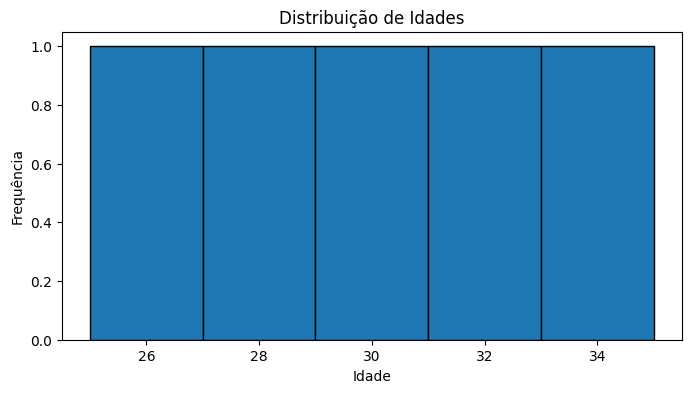

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df['Idade'], bins=5, edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# o gráfico resultante pode parecer bugado, mas ele deve contar
# a quantidade de ocorrências de cada idade (cada uma tem uma),
# então ele está certo

* 2. Gráfico de Barras (comparação entre categorias)

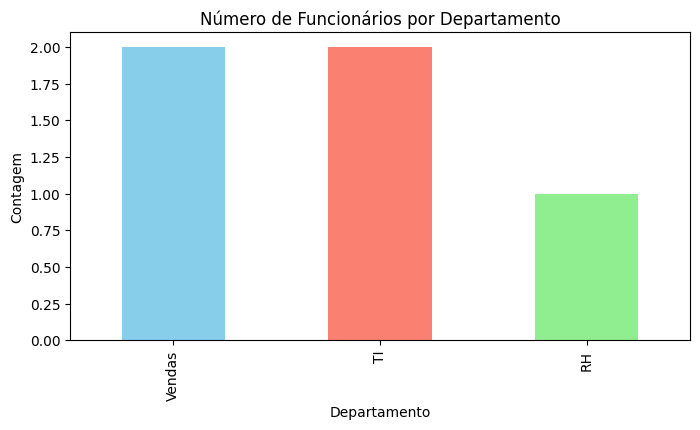

In [9]:
plt.figure(figsize=(8, 4))
df['Departamento'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Número de Funcionários por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.show()

* 3. Boxplot (distribuição e outliers)

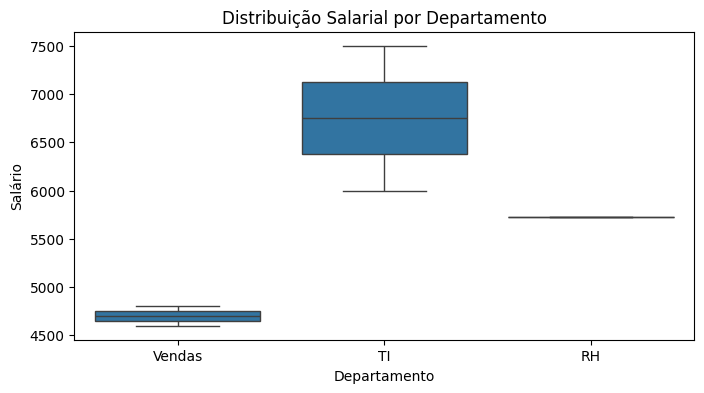

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Departamento', y='Salário', data=df)
plt.title('Distribuição Salarial por Departamento')
plt.show()

* 4. Scatter Plot (relação entre duas variáveis)

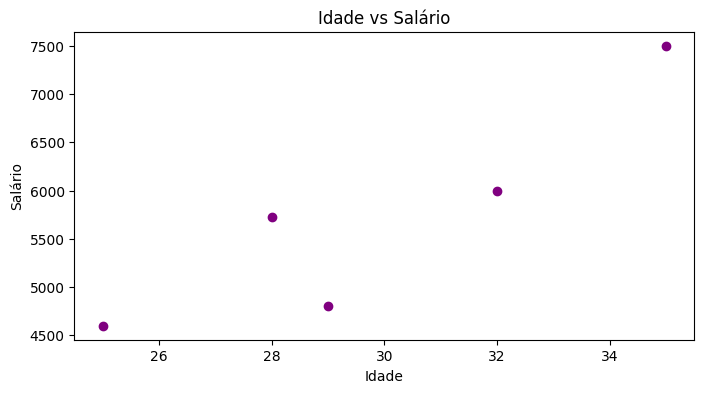

In [11]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Idade'], df['Salário'], color='purple')
plt.title('Idade vs Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.show()

#### Gráficos Avançados

* 5. Heatmap (matriz de correlação)

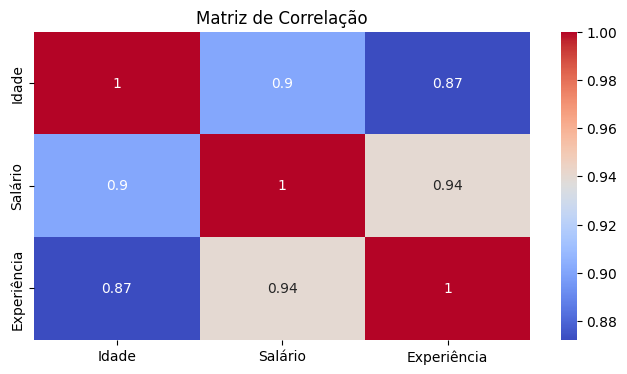

In [12]:
plt.figure(figsize=(8, 4))
corr = df[['Idade', 'Salário', 'Experiência']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

* 6. Gráfico de Linhas (séries temporais)

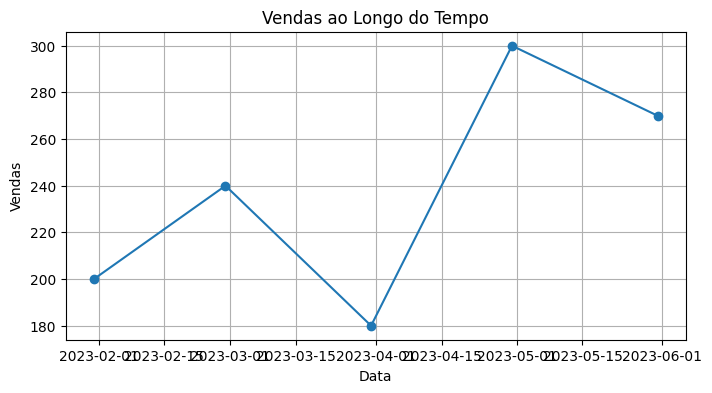

In [16]:
# Criando dados temporais
dates = pd.date_range(start='2023-01-01', periods=5, freq='ME')
df_temp = pd.DataFrame({
    'Data': dates,
    'Vendas': [200, 240, 180, 300, 270]
})

plt.figure(figsize=(8, 4))
plt.plot(df_temp['Data'], df_temp['Vendas'], marker='o')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

### Parte 3: Tratamento de Nulos e Duplicados

1. Nulos (NaN - Not a Number)

* Identificando valores nulos

In [ ]:
# Criando DataFrame com valores nulos
data = {
    'Nome': ['Ana', 'Bruno', np.nan, 'Daniela', 'Eduardo'],
    'Idade': [25, 32, 28, np.nan, 29],
    'Salário': [4500, np.nan, 5200, 7500, 4800]
}
df = pd.DataFrame(data)

# Verificando valores nulos em todo o DataFrame
print(df.isnull())

# Saída:
#     Nome   Idade  Salário
# 0  False   False    False
# 1  False   False     True
# 2   True   False    False
# 3  False    True    False
# 4  False   False    False

# Contando valores nulos por coluna
print(df.isnull().sum())

# Saída:
# Nome       1
# Idade      1
# Salário    1
# dtype: int64

* Tratando valores nulos

In [ ]:
# Opção 1: Remover linhas com valores nulos
df_sem_nulos = df.dropna()
print(df_sem_nulos)

# Opção 2: Preencher valores nulos
# Preenchendo com um valor específico
df_preenchido = df.fillna({'Nome': 'Desconhecido', 'Idade': df['Idade'].mean(), 'Salário': 0})
print(df_preenchido)

# Opção 3: Preencher com o valor anterior (forward fill)
df_ffill = df.fillna(method='ffill')
print(df_ffill)

# Opção 4: Preencher com o próximo valor (backward fill)
df_bfill = df.fillna(method='bfill')
print(df_bfill)

2. Duplicatas

* Identificando linhas duplicadas

In [ ]:
# Criando DataFrame com duplicatas
data = {
    'ID': [1, 2, 3, 2, 4, 1],
    'Nome': ['Ana', 'Bruno', 'Carlos', 'Bruno', 'Daniela', 'Ana'],
    'Vendas': [200, 150, 300, 150, 400, 200]
}
df = pd.DataFrame(data)

# Verificando linhas duplicadas (considerando todas as colunas)
print(df.duplicated())

# Saída:
# 0    False
# 1    False
# 2    False
# 3     True
# 4    False
# 5     True
# dtype: bool

# Verificando duplicatas em colunas específicas
print(df.duplicated(subset=['ID', 'Nome']))

# Contando duplicatas
print(f"Total de duplicatas: {df.duplicated().sum()}")

* Tratando duplicatas

In [ ]:
# Opção 1: Remover todas as duplicatas
df_sem_duplicatas = df.drop_duplicates()
print(df_sem_duplicatas)

# Opção 2: Remover duplicatas mantendo a primeira ocorrência
df_primeira_ocorrencia = df.drop_duplicates(keep='first')
print(df_primeira_ocorrencia)

# Opção 3: Remover duplicatas mantendo a última ocorrência
df_ultima_ocorrencia = df.drop_duplicates(keep='last')
print(df_ultima_ocorrencia)

# Opção 4: Verificar duplicatas em colunas específicas
df_sem_duplicatas_id = df.drop_duplicates(subset=['ID'])
print(df_sem_duplicatas_id)

* Caso especial: Duplicatas com diferenças

In [17]:
# DataFrame onde algumas colunas são iguais mas outras diferem
data = {
    'ID': [1, 1, 2, 2, 3],
    'Nome': ['Ana', 'Ana', 'Bruno', 'Bruno', 'Carlos'],
    'Vendas': [200, 250, 150, 150, 300]
}
df = pd.DataFrame(data)

# Encontrando IDs duplicados, independente de outras colunas
ids_duplicados = df[df.duplicated(subset=['ID'], keep=False)]
print(ids_duplicados)

# Agrupando para ver as diferenças
print(ids_duplicados.groupby('ID').agg(list))

   ID   Nome  Vendas
0   1    Ana     200
1   1    Ana     250
2   2  Bruno     150
3   2  Bruno     150
              Nome      Vendas
ID                            
1       [Ana, Ana]  [200, 250]
2   [Bruno, Bruno]  [150, 150]
